In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf

import pandas as pd
import numpy as np
import urllib
import json
import datetime

In [15]:
train_dataset = pd.read_csv("data/dataset.csv")
time_train = np.array(train_dataset.times)
x_train = np.array(train_dataset.values)[:,1].astype('float32')

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  """
    Description:  
    Input: 
      - series:
      - window_size:
      - batch_size: the batches to use when training
      -shuffle_buffer: size buffer, how data will be shuffled

    Output:

  """
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1])) # x and y (last one)
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

window_size = 30
batch_size = 16
shuffle_buffer_size = 100

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

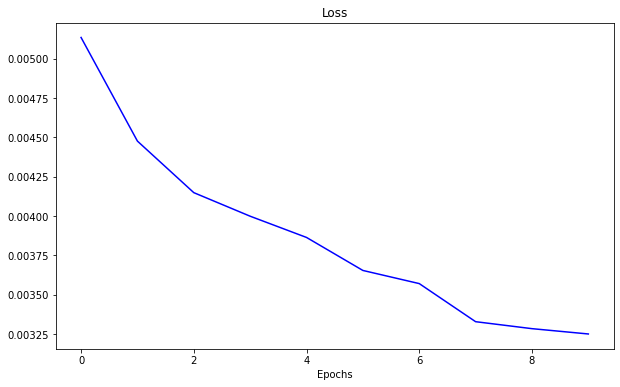

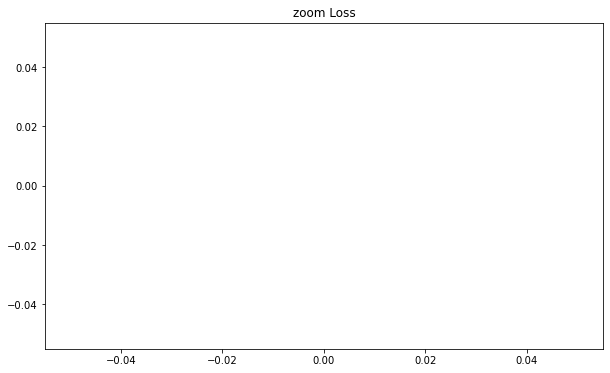

In [18]:
# Dense NN

EPOCHS = 10
LR = 1e-3

l0 = tf.keras.layers.Dense(2*window_size+1, input_shape=[window_size], activation='relu')
l2 = tf.keras.layers.Dense(1)
model = tf.keras.models.Sequential([l0, l2])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3)

optimizer = tf.keras.optimizers.SGD(lr=LR, momentum=0.9)

model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
history = model.fit(train_set, epochs=EPOCHS, verbose=0)

#------------------------------------------------
# Plot Loss
#------------------------------------------------
loss=history.history['loss']
epochs_=range(len(loss)) # Get number of epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs_, loss, 'b')
plt.title('Loss')
plt.xlabel("Epochs")

n_epochs = 2000
plt.figure(figsize=(10, 6))
plt.plot(epochs_[n_epochs:], loss[n_epochs:], 'b')
plt.title('zoom Loss')

#------------------------------------------------
# Forecasting and evaluation
#------------------------------------------------

forecast = []

for time in range(len(values) - window_size):
  forecast.append(model.predict(values[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid[7:], x_valid[7:], format='-o')
plot_series(time_valid[7:], results[7:], format='-o')

print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())